# Description

## Context

- AllLife Bank is a US bank with a growing customer base, majority of whom are primarily liability customers (depositors).
- The bank has a small number of asset customers (borrowers) and in looking to increase their base of this category of customers.
- The bank aims to convert liability customers to both depositors and personal loan customers (borrowers).
- A previous campaign yielded oover 9% conversion rate.
- The retail marketing department is motivated to create better tartgeted campaigns to increase this success rate.
- As a Data Scientist, I am buliding a model to identify potential customers likely to purchase loan plans.

## Objective

- Predict if a liability customer will. buy a loan or not
- Determine the most significant customer attributes
- Identify customer segment to be targeted more for the campaign

## Data Glossary

- ID: Unique identifier for each customer
- Age: Age of customer in completed years
- Experience: Number of years of professional experience.
- Income: Customer's yearly income (in thousands of dollars).
- ZIP Code: ZIP code of customer's home address.
- Family: Size of customer's family.
- CCAvg: Monthly average credit card spending (in thousands of dollars).
- Education: Level of education: 1 for Undergraduate, 2 for Graduate, and 3 for Advanced/Professional.
- Mortgage: Amount of house mortgage, if applicable (in thousands of dollars).
- Personal_Loan: Indicates whether the customer accepted a personal loan in the previous campaign.
- Securities_Account: Presence of a securities account with the bank.
- CD_Amount: Ownership of a Certificate of Deposit (CD) account with the bank.
- Online: Usage of internet banking services by the customer.
- CreditCard: Use of credit card issued by any bank other than AllLife Bank.

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the dataset
df = pd.read_csv('Loan_Modelling.csv')

## Explorative Data Analysis

In [3]:
#Having an overview of the dataframe to get some information on the columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


- The dataframe can be seen to contain information on 5000 customers, described using 14 features(columns)
- All the entries in the dataframe can be seen to be numerical, which is an indication that some have already been labelencoded
- The dataframe also appears to be without missing values, but this would be confirmed

In [4]:
#Randomly selecting 10 rows from the dataframe to inspect its quality and do some exploration
df.sample(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4884,4885,60,34,50,95670,3,2.2,3,0,0,0,0,1,1
3805,3806,29,5,84,93109,3,0.8,1,0,0,0,0,0,0
3254,3255,61,37,9,93907,2,0.3,3,0,0,0,0,1,0
4938,4939,61,35,80,95973,4,1.7,3,0,0,0,0,1,0
2143,2144,56,31,65,92093,3,1.7,1,109,0,0,0,0,0
4885,4886,54,30,28,92103,2,0.8,1,0,0,0,0,1,0
1163,1164,34,9,138,94720,2,7.8,1,227,0,0,0,1,0
193,194,48,24,21,93118,4,0.6,1,0,0,0,0,1,1
1577,1578,34,8,65,92093,1,3.0,1,227,1,0,0,1,0
741,742,61,37,22,94590,1,1.2,3,0,0,0,0,1,0


In [5]:
#Checking the dataframe for duplicated rows
df.duplicated().sum()

0

In [6]:
#Checking the statistical description of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [7]:
#Checking if there are indeed no missing values in the dataframe
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
#Being the target variable, there is a need to check for the count
#of the unique values in the 'Personal_Loan' column
df['Personal_Loan'].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [9]:
#Visual check of the unique values in the personal loan column
df['Personal_Loan'].unique()

array([0, 1])

In [10]:
#Visual check of the unique values in the income column
df['Income'].unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218])

In [11]:
df['ZIPCode'].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94087      1
91024      1
93077      1
94598      1
Name: ZIPCode, Length: 467, dtype: int64

In [12]:
#Visual check of the unique values in the zip code column
df['ZIPCode'].unique()

array([91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023,
       94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604,
       94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117,
       94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019,
       95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245,
       95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123,
       90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305,
       95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612,
       95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037,
       95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833,
       94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720,
       90840, 95035, 93010, 94928, 95831, 91770, 90007, 94102, 91423,
       93955, 94107, 92834, 93117, 94551, 94596, 94025, 94545, 95053,
       90036, 91125, 95120, 94706, 95827, 90503, 90250, 95817, 95503,
       93111, 94132,

In [13]:
#Visual check of the unique values in the family column
df['Family'].unique()

array([4, 3, 1, 2])

In [14]:
#Visual check of the unique values in the age column
df['Age'].unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23])

In [15]:
#Visual check of the unique values in the experience column
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

- The experience column can be seen to have some negative values, which is definitely an error as there can not be negative years of professional experience

In [16]:
#Visual check of the unique values in the average spending column
df['CCAvg'].unique()

array([ 1.6 ,  1.5 ,  1.  ,  2.7 ,  0.4 ,  0.3 ,  0.6 ,  8.9 ,  2.4 ,
        0.1 ,  3.8 ,  2.5 ,  2.  ,  4.7 ,  8.1 ,  0.5 ,  0.9 ,  1.2 ,
        0.7 ,  3.9 ,  0.2 ,  2.2 ,  3.3 ,  1.8 ,  2.9 ,  1.4 ,  5.  ,
        2.3 ,  1.1 ,  5.7 ,  4.5 ,  2.1 ,  8.  ,  1.7 ,  0.  ,  2.8 ,
        3.5 ,  4.  ,  2.6 ,  1.3 ,  5.6 ,  5.2 ,  3.  ,  4.6 ,  3.6 ,
        7.2 ,  1.75,  7.4 ,  2.67,  7.5 ,  6.5 ,  7.8 ,  7.9 ,  4.1 ,
        1.9 ,  4.3 ,  6.8 ,  5.1 ,  3.1 ,  0.8 ,  3.7 ,  6.2 ,  0.75,
        2.33,  4.9 ,  0.67,  3.2 ,  5.5 ,  6.9 ,  4.33,  7.3 ,  4.2 ,
        4.4 ,  6.1 ,  6.33,  6.6 ,  5.3 ,  3.4 ,  7.  ,  6.3 ,  8.3 ,
        6.  ,  1.67,  8.6 ,  7.6 ,  6.4 , 10.  ,  5.9 ,  5.4 ,  8.8 ,
        1.33,  9.  ,  6.7 ,  4.25,  6.67,  5.8 ,  4.8 ,  3.25,  5.67,
        8.5 ,  4.75,  4.67,  3.67,  8.2 ,  3.33,  5.33,  9.3 ,  2.75])

In [17]:
#Visual check of the unique values in the experience column
df['Education'].unique()

array([1, 2, 3])

In [18]:
#Visual check of the unique values in the experience column
df['Mortgage'].unique()

array([  0, 155, 104, 134, 111, 260, 163, 159,  97, 122, 193, 198, 285,
       412, 153, 211, 207, 240, 455, 112, 336, 132, 118, 174, 126, 236,
       166, 136, 309, 103, 366, 101, 251, 276, 161, 149, 188, 116, 135,
       244, 164,  81, 315, 140,  95,  89,  90, 105, 100, 282, 209, 249,
        91,  98, 145, 150, 169, 280,  99,  78, 264, 113, 117, 325, 121,
       138,  77, 158, 109, 131, 391,  88, 129, 196, 617, 123, 167, 190,
       248,  82, 402, 360, 392, 185, 419, 270, 148, 466, 175, 147, 220,
       133, 182, 290, 125, 124, 224, 141, 119, 139, 115, 458, 172, 156,
       547, 470, 304, 221, 108, 179, 271, 378, 176,  76, 314,  87, 203,
       180, 230, 137, 152, 485, 300, 272, 144,  94, 208, 275,  83, 218,
       327, 322, 205, 227, 239,  85, 160, 364, 449,  75, 107,  92, 187,
       355, 106, 587, 214, 307, 263, 310, 127, 252, 170, 265, 177, 305,
       372,  79, 301, 232, 289, 212, 250,  84, 130, 303, 256, 259, 204,
       524, 157, 231, 287, 247, 333, 229, 357, 361, 294,  86, 32

In [19]:
#Visual check of the unique values in the securities account column
print(df['Securities_Account'].unique())

[1 0]


In [20]:
#Visual check of the unique values in the certificate of deposit column
df['CD_Account'].unique()

array([0, 1])

In [21]:
#Visual check of the unique values in the internet banking column
df['Online'].unique()

array([0, 1])

In [22]:
#Visual check of the unique values in the credit card column
df['CreditCard'].unique()

array([0, 1])

## Data Cleaning

In [23]:
#Converting the negative values in the professional experience columns
#to their positive equivalent using the "absolute function" in numpy
df['Experience'] = np.abs(df['Experience'])

In [24]:
#Rechecking the unique values in the professional experience column to confirm cleaning
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43])

## Data Visualisation

In [25]:
#Determining the correlation between the variables
mat_cor = df.corr()
mat_cor

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008202,-0.017695,0.002240,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.993991,-0.055269,-0.030530,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008202,0.993991,1.000000,-0.046876,-0.030837,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.017695,-0.055269,-0.046876,1.000000,-0.030709,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.002240,-0.030530,-0.030837,-0.030709,1.000000,0.027512,-0.012188,-0.008266,0.003614,-0.002974,0.002422,0.021671,0.028317,0.024033
Family,-0.016797,-0.046418,-0.051851,-0.157501,0.027512,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049738,0.645984,-0.012188,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013919,-0.187524,-0.008266,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.011097,0.206806,0.003614,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.024801,-0.007726,-0.008304,0.502462,-0.002974,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [26]:
sub_df = df.drop(['ID'], axis = 1)

In [27]:
sub_df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [28]:
mat_cor = sub_df.corr()
mat_cor

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
Age,1.000000,0.993991,-0.055269,-0.030530,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.993991,1.000000,-0.046876,-0.030837,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.055269,-0.046876,1.000000,-0.030709,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,-0.030530,-0.030837,-0.030709,1.000000,0.027512,-0.012188,-0.008266,0.003614,-0.002974,0.002422,0.021671,0.028317,0.024033
Family,-0.046418,-0.051851,-0.157501,0.027512,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049738,0.645984,-0.012188,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013919,-0.187524,-0.008266,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.011097,0.206806,0.003614,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.007726,-0.008304,0.502462,-0.002974,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities_Account,-0.000436,-0.000989,-0.002616,0.002422,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


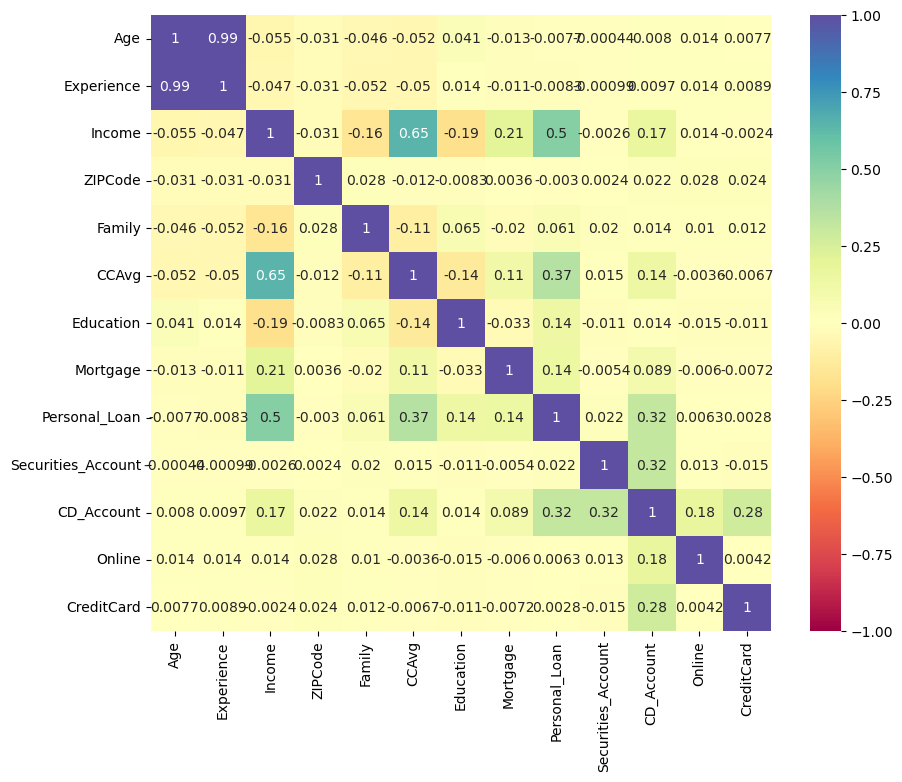

In [29]:
#Creating a heatmap visualization of the correlation matrix

plt.figure(figsize = (10, 8))
sns.heatmap(mat_cor, annot = True, vmin = -1, vmax = 1, cmap = 'Spectral');

- From the correlation matrix above, we can see a good level of multicolinearity amongst the independent variables, which can make the correlation coefficients unreliable

In [30]:
from utils import histogram_boxplot, labeled_barplots

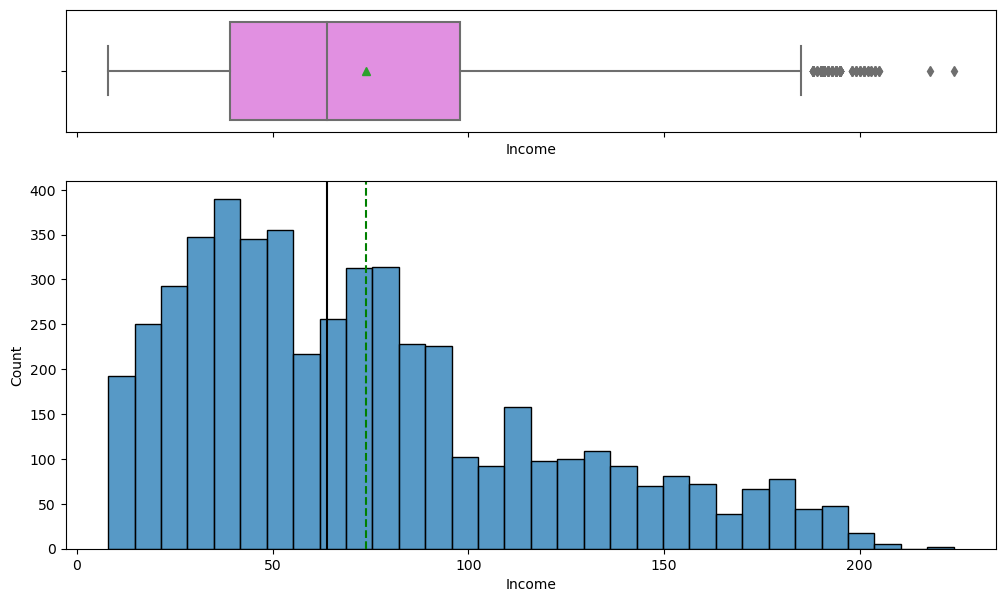

In [31]:
# Creating a histogram and box plot for annual income
histogram_boxplot(data = sub_df, feature = 'Income')

- The above box plot shows a good distrubution of the annual income of the customers with a few outliers customers earling large sums annually

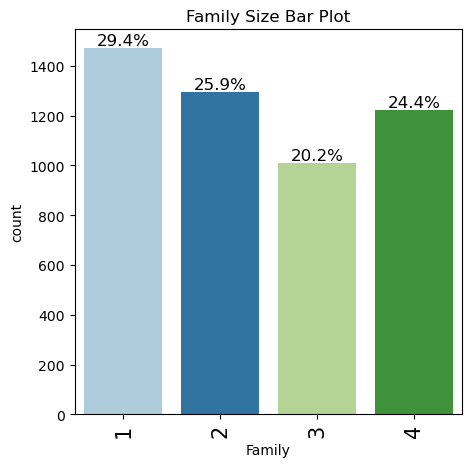

In [32]:
# Creating a bar plot to visualise the family. sizes
labeled_barplots(data = sub_df, feature = 'Family', perc = True, title =
               'Family Size Bar Plot')

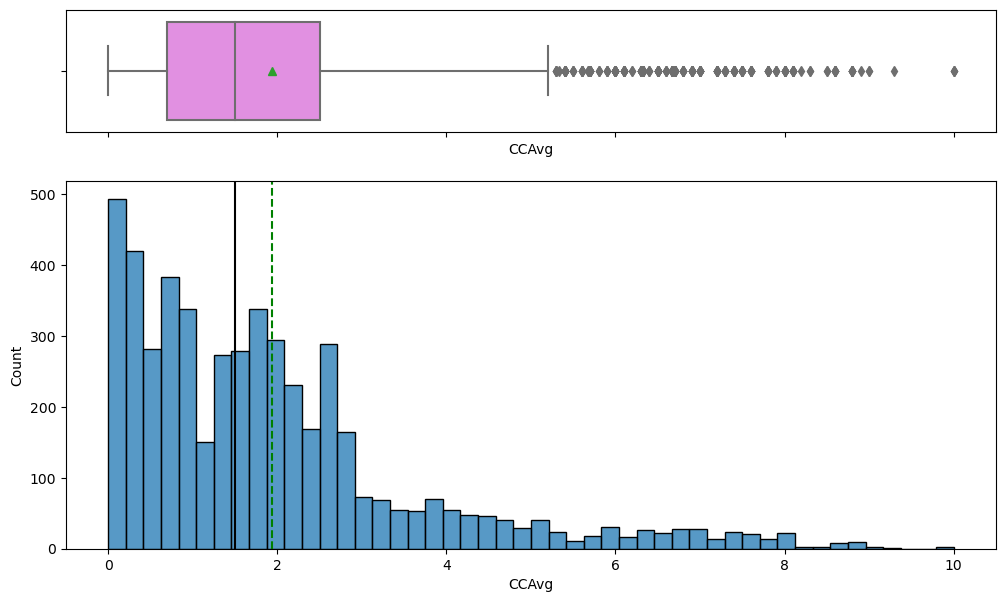

In [33]:
# Creating a histogram and box plot for monthly average spending
histogram_boxplot(data = sub_df, feature = 'CCAvg')

- The average mothly credit card spending of the customers seems to have good number of outliers.

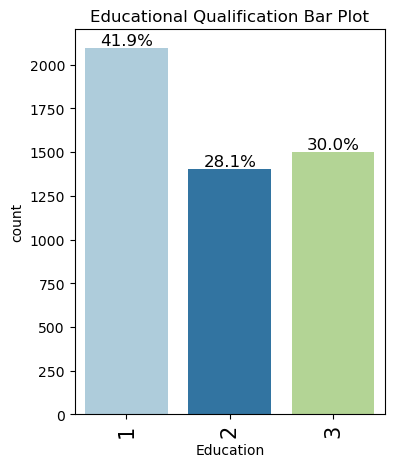

In [34]:
# Creating a bar plot to visualise the educational qualification of the customers
labeled_barplots(data = sub_df, feature = 'Education', perc = True, title =
               'Educational Qualification Bar Plot')

In [35]:
# creating a function to produce a scatterplot between the numeric variables to further visualise their correlation
def data_scatterplot(x, y, title, data = df):
    plt.figure(figsize = (6, 4))
    sns.scatterplot(x = x, y = y, data = df)
    plt.title(title)
    plt.show()

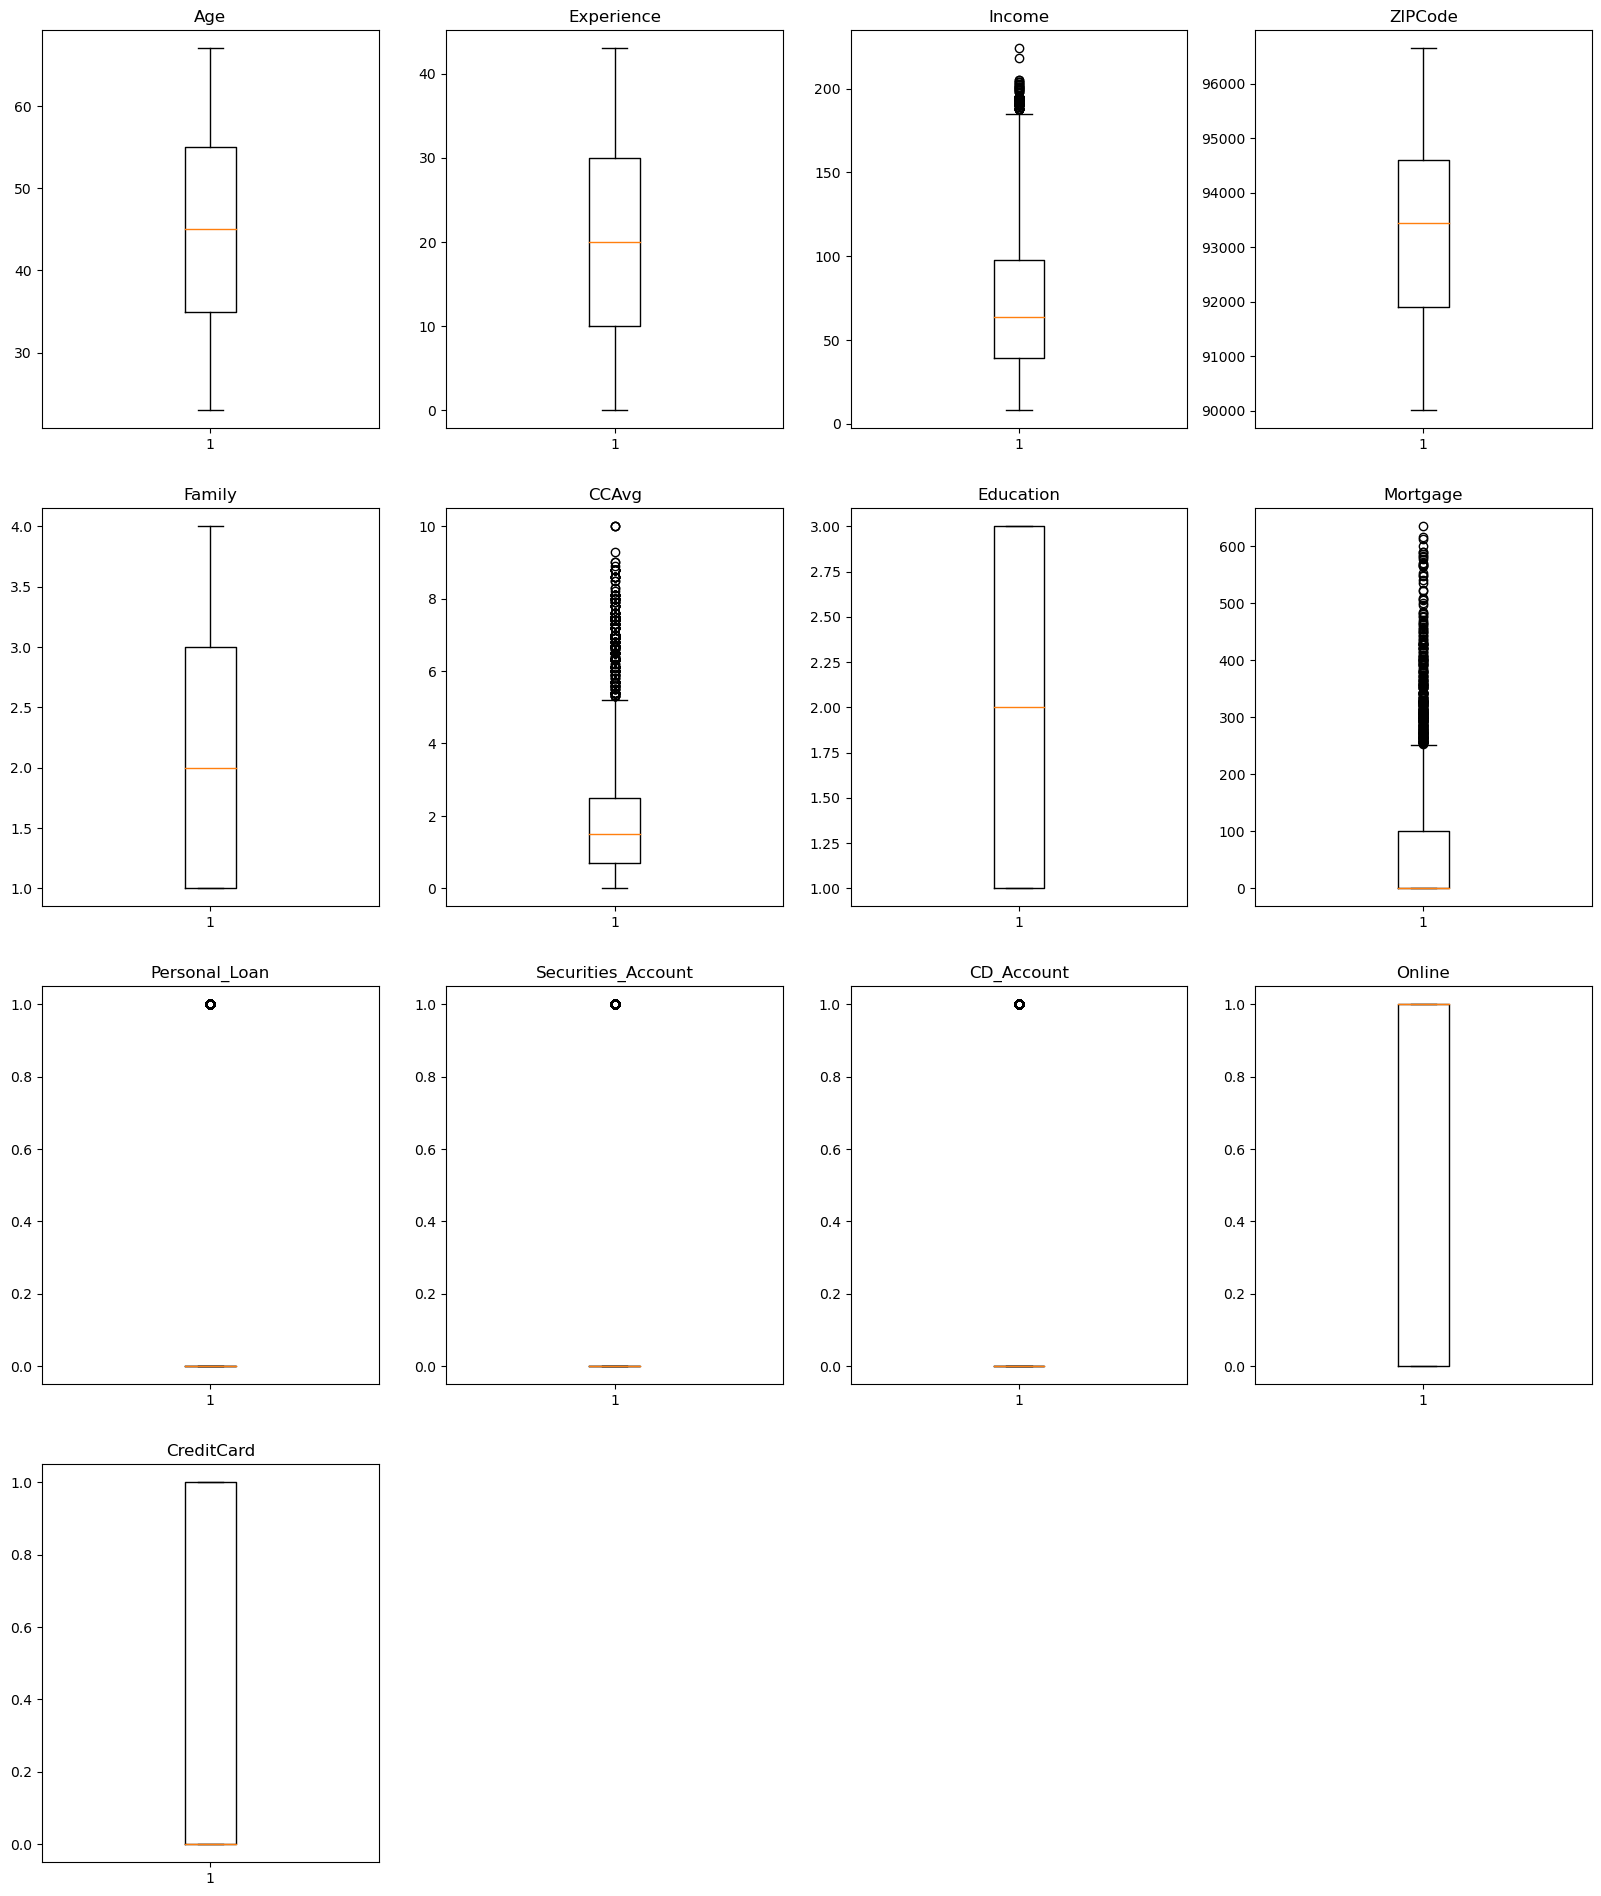

In [36]:
#Creating box plots to detect outliers in the numerical variable

plt.figure(figsize = (20, 30))

for i, variable in enumerate(sub_df):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable])
    plt.title(variable)

plt.show()

- From the above, the Income, CCAvg and the Mortgage appear to have outlier values

In [37]:
# Treating the outliers in the variables

# Dropping the target variable first
sub_df.drop('Personal_Loan', axis = 1, inplace = True)

# Defining a function to treat the outliers. vg being the data frame, an col being the name of the variable
# The various quantile of the data is also determined
def treat_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)
    
# Clipping the outliers to the upper and lower whiskers

    df[col] = np.clip(df[col], lower_whisker, upper_whisker)
    return df

def treat_outliers_all(df, col_list):
    for c in col_list:
        df = treat_outliers(df, c)
    return df
df = treat_outliers_all(df, sub_df)

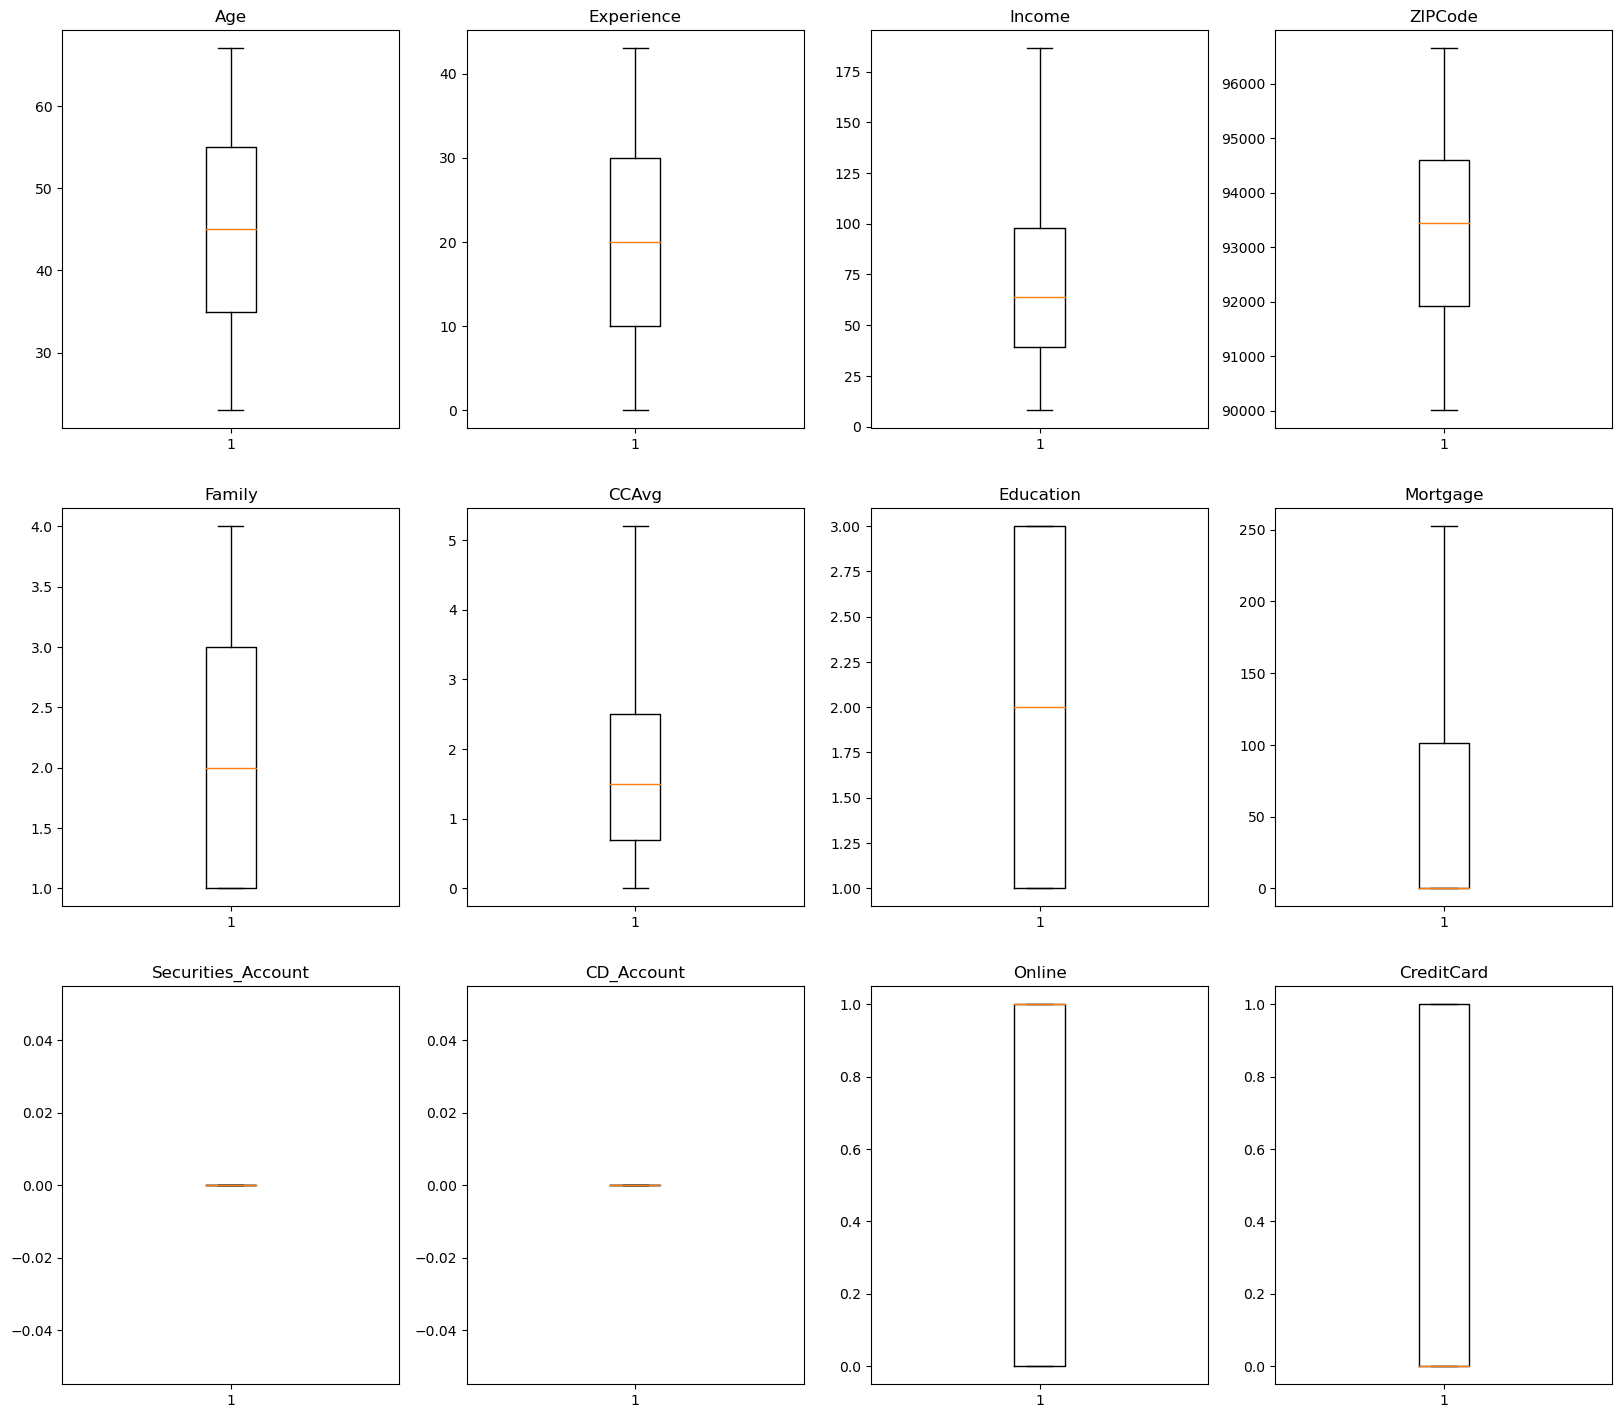

In [38]:
#Creating box plots to visualise the numerical variables after outlier treatment

plt.figure(figsize = (20, 30))

for i, variable in enumerate(sub_df):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable])
    plt.title(variable)

plt.show()

### Model Building (Logistic Regression)

In [39]:
#Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from utils import model_performance_classification #Model performance measurement function

In [40]:
#Splitting the data into the dependent and independent variables

X = sub_df

y = df['Personal_Loan']

In [41]:
y.shape

(5000,)

In [42]:
X.shape

(5000, 12)

In [43]:
df['Personal_Loan'].value_counts(normalize = True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

- Significant level of imbalance can bee seen to exist in the data. This can potentially impact the performance of the classification models

In [44]:
#Splitting the dataset into training, validation and test sets. 20% has been assigned to 
#the test set, of the remainder is split 80:20, training:validation
x_temp, x_test, y_temp, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size = 0.2, random_state = 0)

In [45]:
#Scaling the features in the dataframe putting values in each feature within a consistent scale
scaler = MinMaxScaler()

x_train_sd = scaler.fit_transform(x_train)
x_val_sd = scaler.transform(x_val)
x_test_sd = scaler.transform(x_test)

In [46]:
#Creating an instance of the logistic regression model
log_reg = LogisticRegression(random_state = 0)

#Building the model using the training set of the scaled data
log_reg.fit(x_train_sd, y_train)

LogisticRegression(random_state=0)

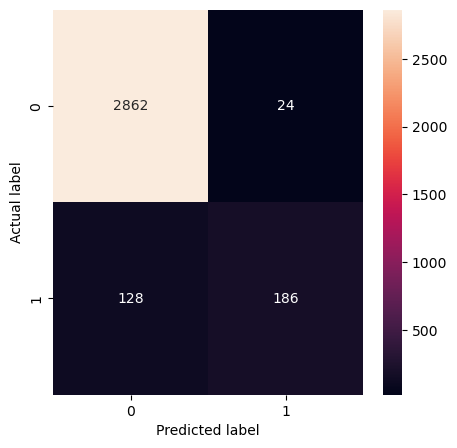

,Accuracy,Recall,Precision,F1-score
0,0.9525,0.592357,0.885714,0.709924


In [47]:
#Evaluating the performance of the model on the training set
log_reg_train = model_performance_classification(log_reg, x_train_sd, y_train)
log_reg_train

#### Model Performance Evaluation

##### - Accuracy
The model correctly predicts if a customer is going to subscribe to personal loan or not 95% of the times, while it incorrectly predicts if the customer would subscribe to personal loan 5% of its predictions
##### - Recall
Of all the customers that would indeed subscribe to a personal loan, the model was only able to correctly predict 60% of then to take the personal loan, while it wrongly predicted that 30% of them would not subscribe to the load.
##### - Precision
The model predicted that 314 customers would subscribe to a personal loan, of this number 89% of them indeed subscribed to the loan, while 11% did not subcribe to the personal loan


- The difference between the precision and recall is indicative that the model is not yet performing optimally. Thuis could be due to the imbalance in the data, which would cause the model to learn more of the classes that are higher iom number, hence its learning these classes over the minority classes

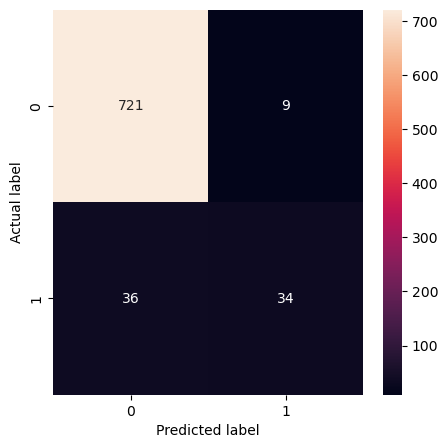

,Accuracy,Recall,Precision,F1-score
0,0.94375,0.485714,0.790698,0.60177


In [48]:
#Evaluating the performance of the model on the validation set
log_reg_val = model_performance_classification(log_reg, x_val_sd, y_val)
log_reg_val

- The model performance dropped on all metrics when trained on the validation data.

### Model Metrics Improvement

In [49]:
#Rebuliding the model, and specifying the the class weight, so attention us given to the minority class

log_reg1 = LogisticRegression(random_state = 0, class_weight = {1:0.9, 0:0.1})

log_reg1.fit(x_train_sd, y_train)

LogisticRegression(class_weight={0: 0.1, 1: 0.9}, random_state=0)

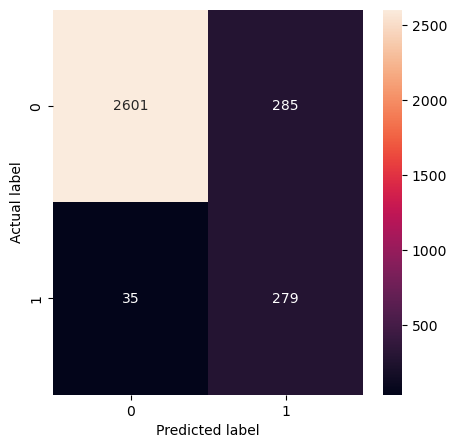

,Accuracy,Recall,Precision,F1-score
0,0.9,0.888535,0.494681,0.635535


In [50]:
#Evaluating the performance of the model on the training set
log_reg1_train = model_performance_classification(log_reg1, x_train_sd, y_train)
log_reg1_train

#### Rebiult Model Performance Evaluation

##### - Accuracy
The model correctly predicts if a customer is going to subscribe to personal loan or not 90% of the times, while it incorrectly predicts if the customer would subscribe to personal loan 10% of its predictions
##### - Recall
Of all the customers that would indeed subscribe to a personal loan, the model was only able to correctly predict 89% of then to take the personal loan, while it wrongly predicted that 11% of them would not subscribe to the load.
##### - Precision
The model predicted that 564 customers would subscribe to a personal loan, of this number only 49% of them indeed subscribed to the loan, while 51% did not subcribe to the personal loan


- Attempting to improve the performance of the model by specifying the class weight to give preference to the minority class does not seem to give the desired 

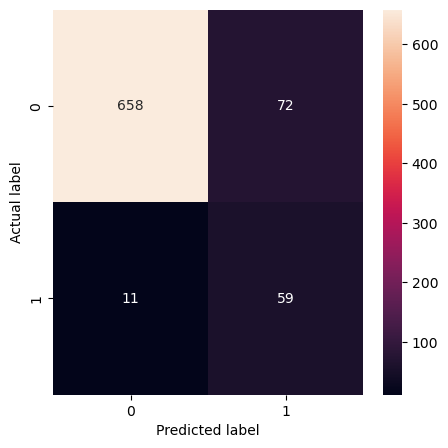

,Accuracy,Recall,Precision,F1-score
0,0.89625,0.842857,0.450382,0.587065


In [51]:
#Evaluating the performance of the model on the validation set
log_reg1_val = model_performance_classification(log_reg1, x_val_sd, y_val)
log_reg1_val

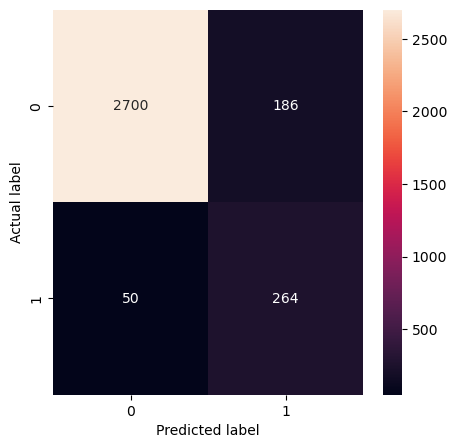

,Accuracy,Recall,Precision,F1-score
0,0.92625,0.840764,0.586667,0.691099


In [52]:
#Setting the threshold to 0.6 to increase the sensitivity of the model and re-evaluating the performance of the model on the training set
log_reg1_train2 = model_performance_classification(log_reg1, x_train_sd, y_train, threshold = 0.6)
log_reg1_train2

Increasing the threshold has led to an improvement of the accuracy and precision of the model, we can therefore evaluate the model using the validation set and same threshold of 0.6

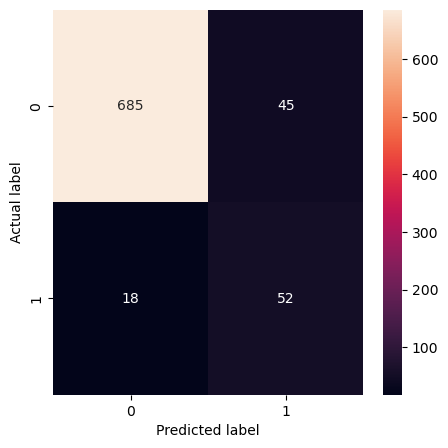

,Accuracy,Recall,Precision,F1-score
0,0.92125,0.742857,0.536082,0.622754


In [53]:
#Evaluating the performance of the model on the validation set,  setting the threshold to be 0.6
log_reg1_val2 = model_performance_classification(log_reg1, x_val_sd, y_val, threshold = 0.6)
log_reg1_val2

The above performance shows that although the model improved on the training set upon varying the threshold, it decreased on the validation set and is therefor not generalisig well but rather overfitting

### Treating Data Imbalance

In [54]:
#Importing SMOTE from the imblearn library
from imblearn.over_sampling import SMOTE

In [55]:
#SMOTE treatment of the original dependent and independent variables

#Creating an instance of the SMOTE
smote = SMOTE(random_state = 0)

#Applying SMOTE to the 
X_sm, y_sm = smote.fit_resample(X, y)

In [56]:
#Sense checking the dependent variable to confirm balancing
y_sm.value_counts(normalize = True)

0    0.5
1    0.5
Name: Personal_Loan, dtype: float64

- Distribution of the classes in the target can now be seen to be balanced

In [57]:
# Splitting the treated variables into the training, validation and the testing splits
x1_temp, x1_test, y1_temp, y1_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 0)
x1_train, x1_val, y1_train, y1_val = train_test_split(x1_temp, y1_temp, test_size = 0.2, random_state = 0)

In [58]:
#Scaling the features in the dataframe putting values in each feature within a consistent scale
scaler = MinMaxScaler()

x1_train_sd = scaler.fit_transform(x1_train)
x1_val_sd = scaler.transform(x1_val)
x1_test_sd = scaler.transform(x1_test)

In [59]:
#Building the model using the training set of the balanced data
log_reg2 = LogisticRegression(random_state = 0)

log_reg2.fit(x1_train_sd, y1_train)

LogisticRegression(random_state=0)

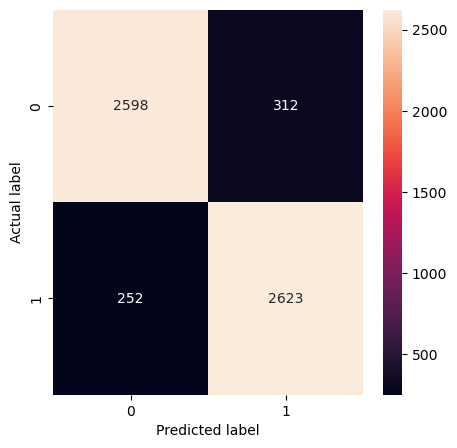

,Accuracy,Recall,Precision,F1-score
0,0.902506,0.912348,0.893697,0.902926


In [60]:
#Evaluating the performance of the model on the training set
log_reg2_train = model_performance_classification(log_reg2, x1_train_sd, y1_train)
log_reg2_train

#### Model Performance Evaluation for Balanced Data
##### Accuracy
- The overall accuracy of the model in making predictions for both customers that would take personal loans and those that would not take personal loans is 90%.
##### Recall
- There were 2875 customers would truely take the personal loan, the model however correctly predicted 2623 customers would take the loan and wrongly predicted that 252 would not, giving the model a recall of 91%
##### Precision
- The model has predicted that 2933 customers would take the personal loan, however of these, only 2623 customers would actually take the loan while 310 would not, giving the model a precision of 89%


The model has shown great improvement following the balancing of the data. It is however necessary to check the performance of the model using the validation data

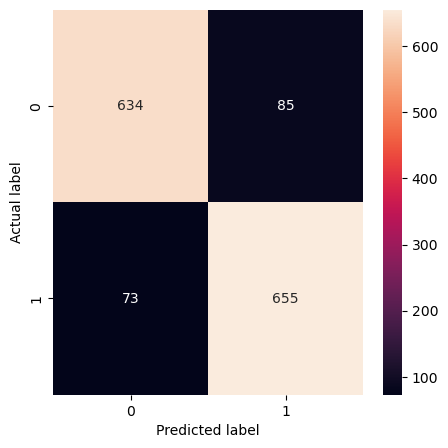

,Accuracy,Recall,Precision,F1-score
0,0.890809,0.899725,0.885135,0.892371


In [61]:
#Evaluating the performance of the model on the validation set
log_reg2_val = model_performance_classification(log_reg2, x1_val_sd, y1_val)
log_reg2_val

This model appears to be generalising well with its performance on the validation data being close to its performance on the training data, we can therefore also try it out on the test set

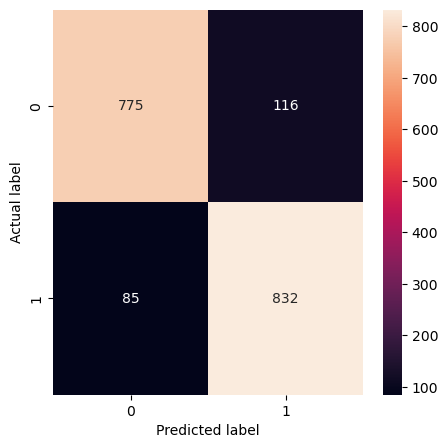

,Accuracy,Recall,Precision,F1-score
0,0.888827,0.907306,0.877637,0.892225


In [62]:
#Evaluating the performance of the model on the validation set
log_reg2_test = model_performance_classification(log_reg2, x1_test_sd, y1_test)
log_reg2_test

The model perfromance is maintained on the test set as well

## Decision Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [64]:
#Creating an instance of the decision tree
dec_tree = DecisionTreeClassifier(random_state = 0)
#Building the model
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

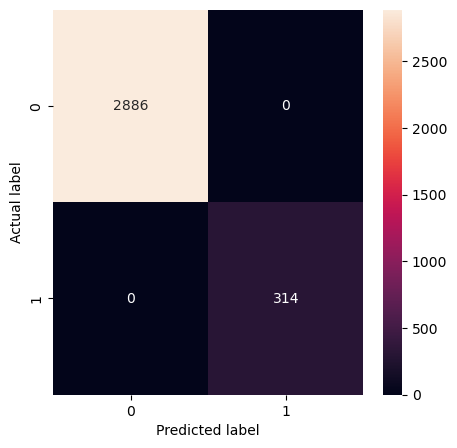

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [65]:
#Evaluating the performance of the decision tree on the training set
dec_tree_train = model_performance_classification(dec_tree, x_train, y_train)
dec_tree_train

- The above performance metrics are potraying the picture of a perfect model, having 100% on all metrics. This is likely to be due to overfitting

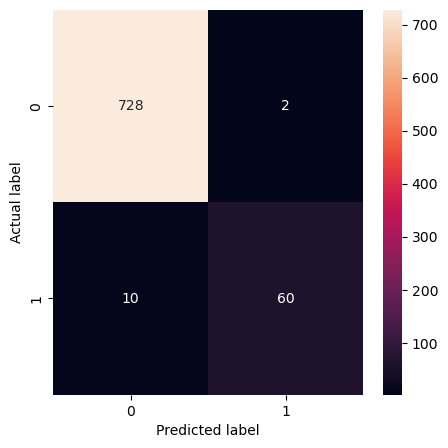

,Accuracy,Recall,Precision,F1-score
0,0.985,0.857143,0.967742,0.909091


In [66]:
#Evaluating the performance of the decision tree on the validation set
dec_tree_val = model_performance_classification(dec_tree, x_val, y_val)
dec_tree_val

- The above clearly shows that indeed the model was overfitting on the training set as a decrease was observed across all the performance metrics when checked with the validation set

#### Model improvement by adjusting class weight

In [67]:
#Creating another instance of the decision tree, indicating the class weight
dec_tree2 = DecisionTreeClassifier(random_state = 0, class_weight= {0:0.1, 1:0.9})
#Building the model
dec_tree2.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=0)

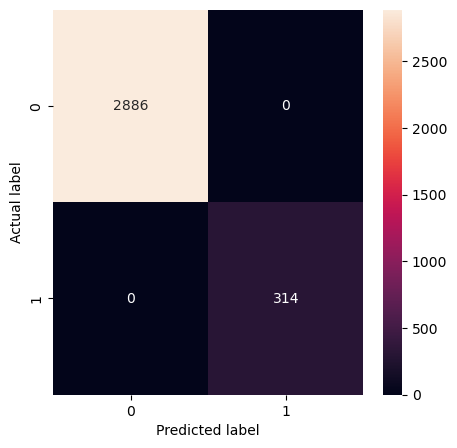

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [68]:
#Evaluating the performance of the decision tree on the training set
dec_tree2_train = model_performance_classification(dec_tree2, x_train, y_train)
dec_tree2_train

- The model still appears to be overfitting despite setting the class weight to favor the minority class. We however still use the validation split of the data to test the performance aslo

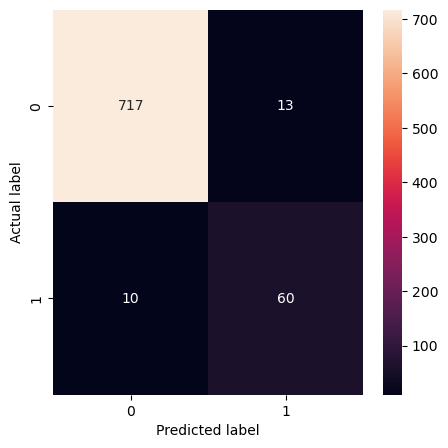

,Accuracy,Recall,Precision,F1-score
0,0.97125,0.857143,0.821918,0.839161


In [69]:
#Evaluating the performance of the decision tree on the training set
dec_tree2_val = model_performance_classification(dec_tree2, x_val, y_val)
dec_tree2_val

- It can be observed from the above that the model still overfits

#### Model improvement by using the balanced dataset

In [70]:
#Creating another instance of the decision tree, using the balanced data
dec_tree3 = DecisionTreeClassifier(random_state = 0)
#Building the model using the balanced data
dec_tree3.fit(x1_train, y1_train)

DecisionTreeClassifier(random_state=0)

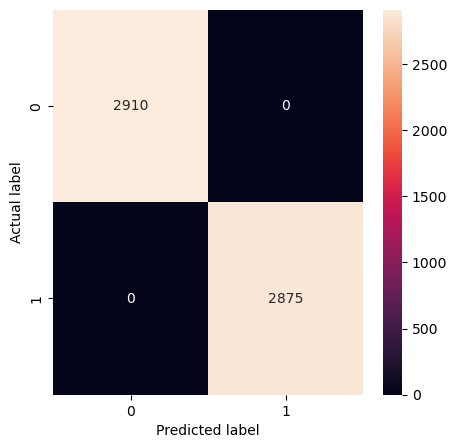

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [71]:
#Evaluating the performance of the decision tree on the training set
dec_tree3_train = model_performance_classification(dec_tree3, x1_train, y1_train)
dec_tree3_train

- With the balanced data, the decision tree is still appearing to be overfitting

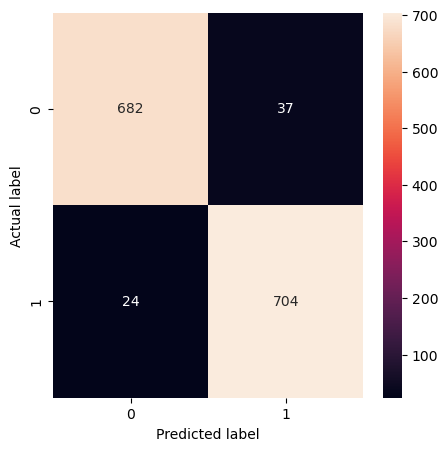

,Accuracy,Recall,Precision,F1-score
0,0.957844,0.967033,0.950067,0.958475


In [72]:
#Evaluating the performance of the decision tree on the training set
dec_tree3_val = model_performance_classification(dec_tree3, x1_val, y1_val)
dec_tree3_val

- The model performance has dropped with the validation data. Although the performance metrics are good, but the model still overfits when compared to the training set

#### Model improvement by setting the depth where the model must stop building

In [73]:
#Creating another instance of the decision tree indicating the maximum depth of the tree, and still using the balanced data
dec_tree4 = DecisionTreeClassifier(max_depth = 4, random_state = 0)
#Building the model
dec_tree4.fit(x1_train, y1_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

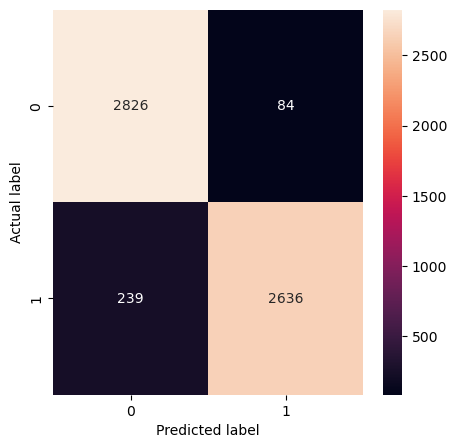

,Accuracy,Recall,Precision,F1-score
0,0.944166,0.91687,0.969118,0.94227


In [74]:
#Evaluating the performance of the decision tree on the training set
dec_tree4_train = model_performance_classification(dec_tree4, x1_train, y1_train)
dec_tree4_train

- The model is now showing a performance less likely to be overfitting, but performing well on all performance metrics

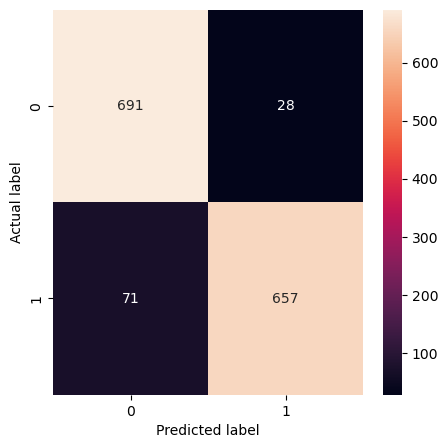

,Accuracy,Recall,Precision,F1-score
0,0.931583,0.902473,0.959124,0.929936


In [75]:
#Evaluating the performance of the decision tree on the training set
dec_tree4_val = model_performance_classification(dec_tree4, x1_val, y1_val)
dec_tree4_val

- The performance obtained by the model on the validation data is in close tandem with that obtained from the training set, which indicates that the model is now generalising well, and not overfitting

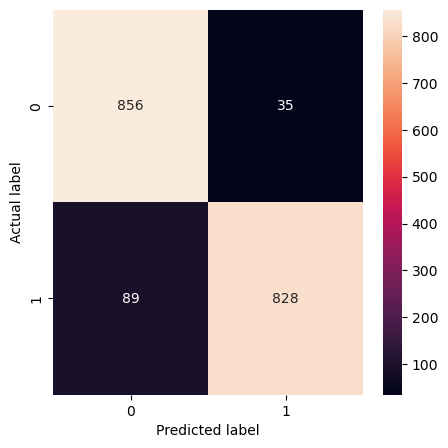

,Accuracy,Recall,Precision,F1-score
0,0.931416,0.902944,0.959444,0.930337


In [76]:
#Evaluating the performance of the decision tree on the test set
dec_tree4_test = model_performance_classification(dec_tree4, x1_test, y1_test)
dec_tree4_test

#### DecisionTree Model Performance Evaluation for Balanced Data
##### Accuracy
- The overall accuracy of the model in making predictions for both customers that would take personal loans and those that would not take personal loans is 90%. This means that of the 1808 prdictions made by the DecisionTree, 1684 were correct
##### Recall
- In the test split of the data, there were 917 customers would truely take the personal loan, the model however correctly predicted 828 customers would take the loan and wrongly predicted that 89 would not, giving the model a recall of 90%
##### Precision
- The model has predicted that 863 customers would take the personal loan, however of these, only 828 customers would actually take the loan while 35 would not, giving the model a precision of 96%


The model has shown great imorovement following the balancing of the data and setting a max depth of 4. 

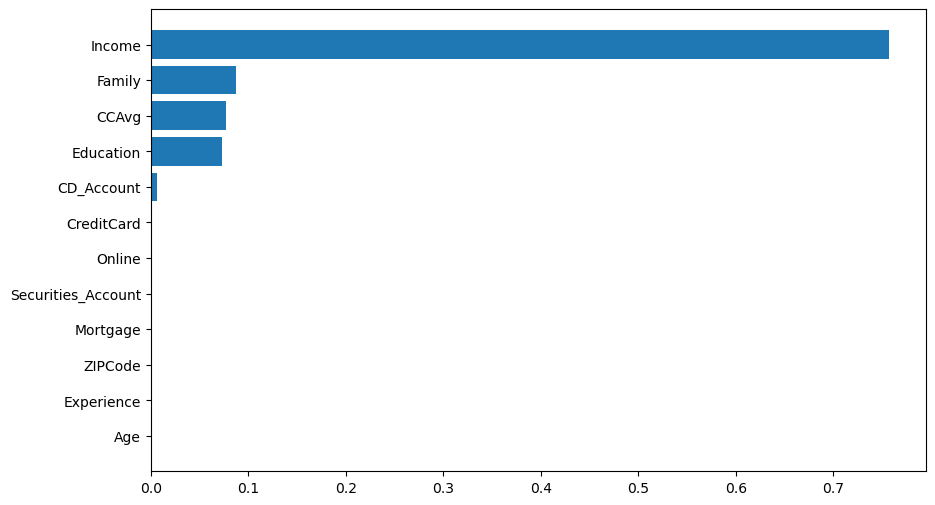

In [77]:
#plotting the feature importance of the decisiontree model
plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(dec_tree4.feature_importances_)
plt.barh(X.columns[sorted_idx], dec_tree4.feature_importances_[sorted_idx])
plt.show()

## Random Forest Classifier

In [78]:
# Importing the more necessary libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [79]:
#Creating an instance of the random forest classifier
rf = RandomForestClassifier(random_state = 0)

#Training the model using the balanced data

rf.fit(x1_train, y1_train)

RandomForestClassifier(random_state=0)

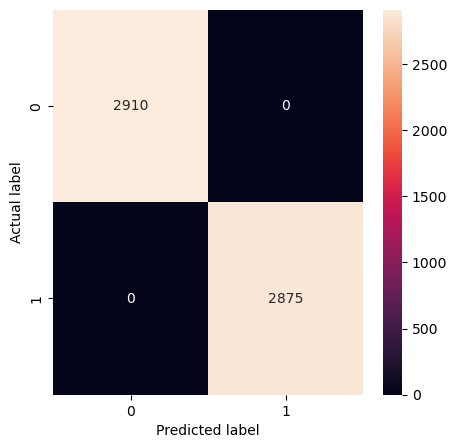

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [80]:
#Checking the model performance
rf_train = model_performance_classification(rf, x1_train, y1_train)
rf_train

- The model appears to be overfitting as it has not made any mistakes in making its predictions

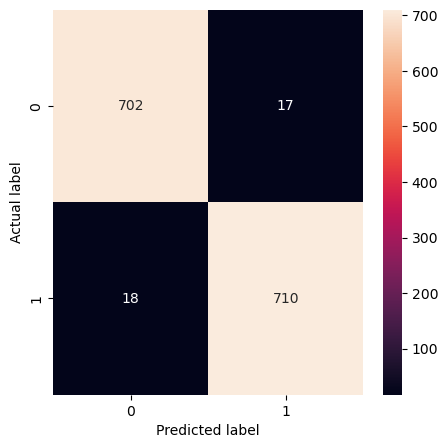

,Accuracy,Recall,Precision,F1-score
0,0.975812,0.975275,0.976616,0.975945


In [81]:
#Checking the model performance on the validation set
rf_val = model_performance_classification(rf, x1_val, y1_val)
rf_val

- The model is now making some mistakes on the validation dataset unlike its performance on the training set where it is entirely perfect

#### Model improvement by setting the depth where the model must stop building

In [82]:
#Creating another instance of the random forest classifier specifying a tree depth of 4
rf2 = RandomForestClassifier(max_depth = 4, random_state = 0)

#Training the model using the balanced data

rf2.fit(x1_train, y1_train)

RandomForestClassifier(max_depth=4, random_state=0)

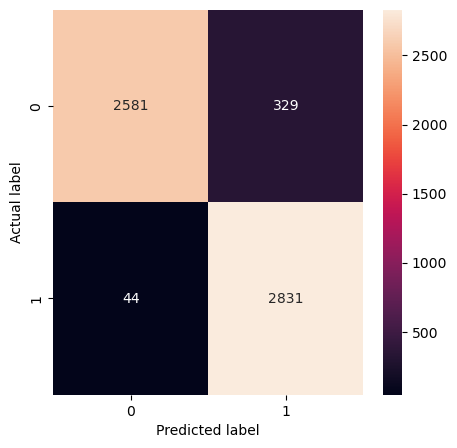

,Accuracy,Recall,Precision,F1-score
0,0.935523,0.984696,0.895886,0.938194


In [83]:
#Checking the model performance
rf2_train = model_performance_classification(rf2, x1_train, y1_train)
rf2_train

- The performance of the model is still high but no longer perfect. There is still a possibility that it is overfitting, but this can be confirmed passing in the validation data

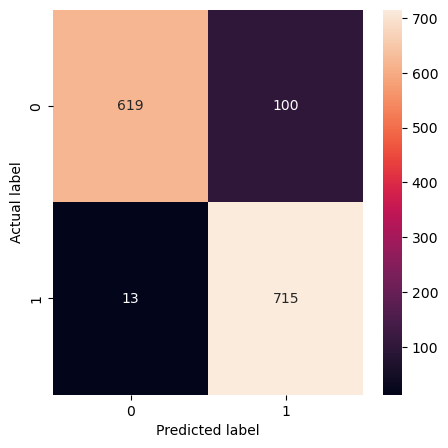

,Accuracy,Recall,Precision,F1-score
0,0.921907,0.982143,0.877301,0.926766


In [84]:
#Checking the model performance on the validation set
rf2_val = model_performance_classification(rf2, x1_val, y1_val)
rf2_val

- The model performance is maintained on the validation data, meaning that the model is now generalising well

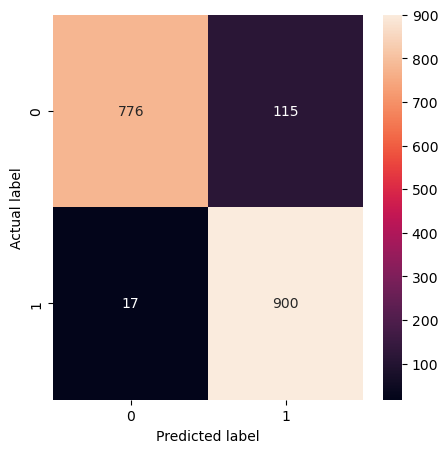

,Accuracy,Recall,Precision,F1-score
0,0.926991,0.981461,0.8867,0.931677


In [85]:
#Checking the model performance on the test set
rf2_test = model_performance_classification(rf2, x1_test, y1_test)
rf2_test

### Random Forest Performance Evaluation

##### Accuracy
- The overall accuracy of the model in making predictions for both customers that would take personal loans and those that would not take personal loans is 93%. This means that of the 1808 prdictions made by the DecisionTree on the balanced test set, 1676 were correct
##### Recall
- In the test split of the balanced data, there were 900 customers would truely take the personal loan, the model however correctly predicted 828 customers would take the loan and wrongly predicted that 17 would not, giving the model a recall of 90%
##### Precision
- The model has predicted that 1015 customers that would take the personal loan, however of these, only 900 customers would actually take the loan while 155 would not, giving the model a precision of 89%


The model has shown great improvement following the balancing of the data and setting a max depth of 4. 


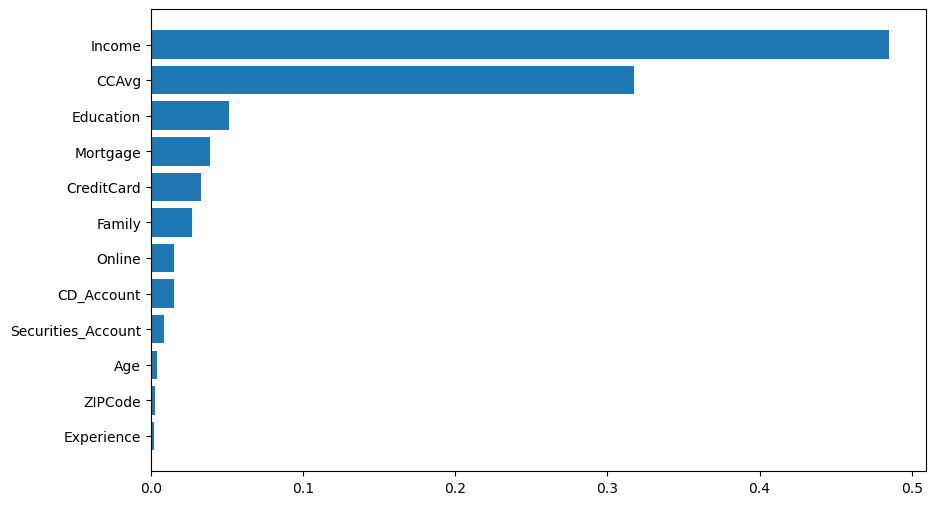

In [86]:
#plotting the feature importance of the random forest
plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(rf2.feature_importances_)
plt.barh(X.columns[sorted_idx], rf2.feature_importances_[sorted_idx])
plt.show()

## Gradient Boosting Classifier

In [87]:
#creating an instance of the gradient boosting classifier

gb = GradientBoostingClassifier(random_state = 0)

#Buliding the model on the training data
gb.fit(x1_train, y1_train)

GradientBoostingClassifier(random_state=0)

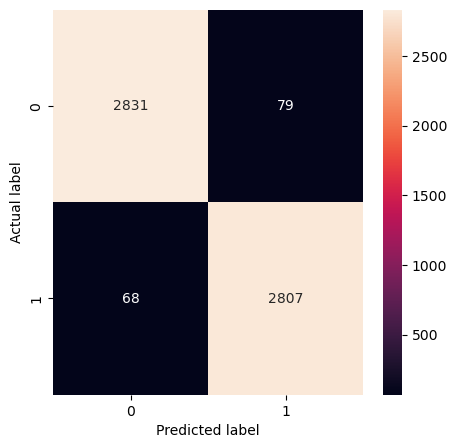

,Accuracy,Recall,Precision,F1-score
0,0.974589,0.976348,0.972626,0.974484


In [88]:
#Checking the performance pf the gradient boosting model on the training data
gb_train = model_performance_classification(gb, x1_train, y1_train)
gb_train

- The model seems to. be performing fine on te training data, but might be tending towards overfitting.

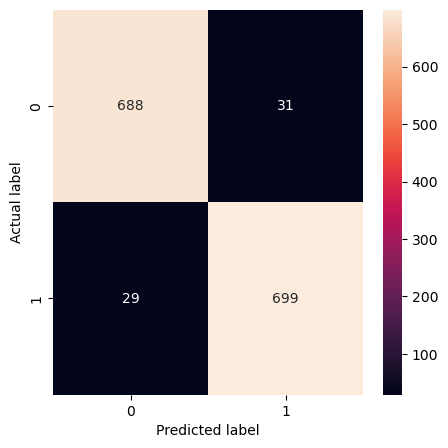

,Accuracy,Recall,Precision,F1-score
0,0.958535,0.960165,0.957534,0.958848


In [89]:
#Checking the performance pf the gradient boosting model on the validation data
gb_val = model_performance_classification(gb, x1_val, y1_val)
gb_val

- The good performance of the model on the training data is maintained on the validation data as well, the model is therefore generalising well

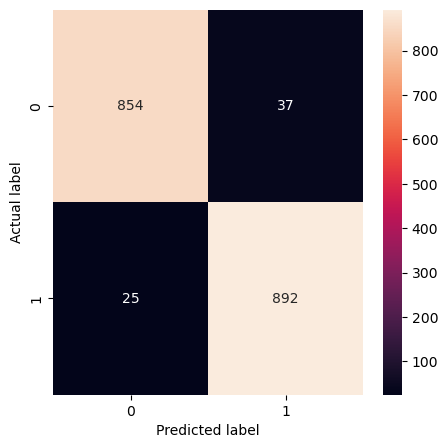

,Accuracy,Recall,Precision,F1-score
0,0.965708,0.972737,0.960172,0.966414


In [90]:
#Checking the performance pf the gradient boosting model on the test data
gb_test = model_performance_classification(gb, x1_test, y1_test)
gb_test

### Gradient Boosting Performance Evaluation

##### Accuracy
- The overall accuracy of the model in making predictions for both customers that would take personal loans and those that would not take personal loans is 97%. This means that of the 1808 prdictions made by the DecisionTree on the balanced test set, 1746 were correct
##### Recall
- In the test split of the balanced data, there were 917 customers that would truely take the personal loan, the model however correctly predicted 892 customers would take the loan and wrongly predicted that 25 would not, giving the model a recall of 97%
##### Precision
- The model has predicted that 929 customers would take the personal loan, however of these, only 892 customers would actually take the loan while 37 would not, giving the model a precision of 97%


The model has shown great on the gadient boosting classifier model 

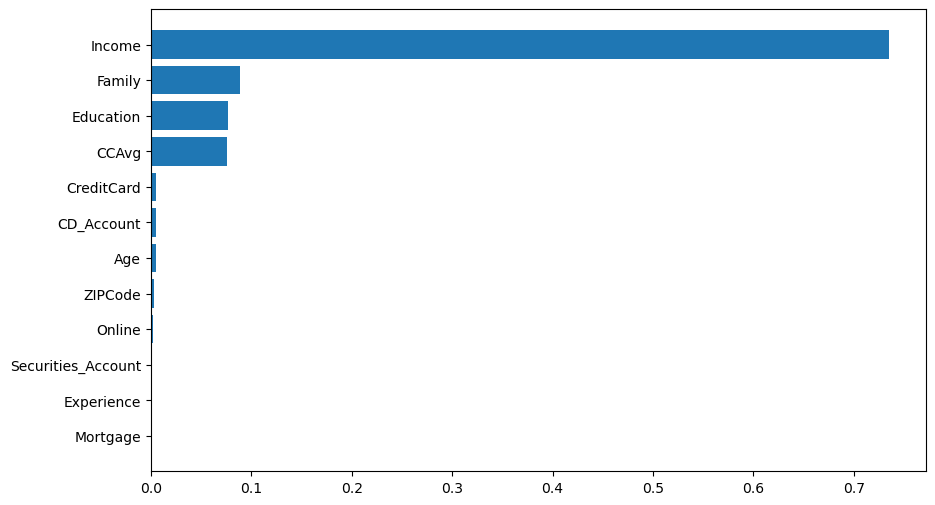

In [91]:
#plotting the feature importance of the gradient boosting model
plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(gb.feature_importances_)
plt.barh(X.columns[sorted_idx], gb.feature_importances_[sorted_idx])
plt.show()

## Insights and Recommendations


- ### Logistic Regression Classifier

    - The logistic regression model did not do a good job in classifying the dataset due to the imbalance in the classes of the features of the dataset.
    - An improvement was however recorded when the dataset was balanced using the Synthetic Minority Oversampling Technique.
    - It recorded an accuracy of 89% on the testing data, which meant that of all its prediction, of both customers that would take personal loans and those that would not, it was correct in 89% of the predictions.
    - The logistics regression model was also able to detect 90% of the customers that would truly take personal loan.
    - The model had a precision of 96% in predicting customers that would take personal loan.
    

- ### Decision Tree Classifier

    - The decision tree model overfitted to the training dataset for both the balanced an imbalanced data, with performance metrices indicating it is a perfect model, but having reduced performance on the validation dataset.
    - For the imbalanced data, the model continued to overfit even when the class weight was specified to put focus on the minority class.
    - The problem of overfitting was however solved by prepruning the tree, limiting its maximum depth to 4.
    - At a maxiumdepth of 4, the prediction of the model if customers would take personal loans or not was correct 93% of the times
    - Following maximum depth stipulation, the model attained a recall of 90% in correctly detecting customers that would indeed take personal loans.
    - In its overall prediction on customers that would take personal loans, the model was correct 96% of the times.
    - The above are therefor clear indications that when compared to the Logistic Regression Classifier, the Decision Tree Classifier would do a better job in predicting customers that would take personal loans.
    
    
    
    
    
    
- ### Recommendations on Marketing Campaign

    - From the feature importance plots from the tree based models and the correlation coefficient of the variables, it can be easily seen that the key features that determines a customer taking personal loan or not are;
        - Annual Income of the customers; The higher a customers annual income, the more likely they are to take a personal loan
        - Family size of the customer; Customers with larger families are more likely to take personal loans
        - Average Spending on Credit Card per month; The higher a customer's spending on their credit card in a month, the more likely it is for them to take personal loan
        - Education; Customer with heigher levels of education are more likely to take personal loans than customers with lower level of education
        
    - It is therefore pertinent that the marketing team target their loan campaign on these categories of customers in other to get good conversion rates